<h1>Erik Blood Development Notebook</h1>
<h2>Using Random Forrest Regression </h2>
<p>In this notebook I will be experimenting with the data set </p>

In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


<h2> Read data set, assign features and split into X and y </h2>

In [11]:
df = pd.read_csv("../dataset/1-CombinedDataset.csv", index_col=0).rename(columns={'NASDAQCOM': 'NASDAQ', 'BofA_Yield_Index_PCH': 'BofA_Yeild','CA_Consumer_Price_Index':'CONSUM_PI','FORECLOSURE':'FORE','Average DGS':'DGS'})

In [12]:
df

,DATE,FORE,CAUR,DGS,DFF,NASDAQ,ZHVI,MORT30US,BofA_Yeild,CONSUM_PI
0,2014-01-01,1440,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288
1,2014-02-01,524,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547
2,2014-03-01,611,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028
3,2014-04-01,328,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468
4,2014-05-01,503,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918
...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,170,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474
101,2022-06-01,196,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328
102,2022-07-01,147,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271
103,2022-08-01,214,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620


In [13]:
df['DATE'] = pd.to_datetime(df['DATE'])    
df['DATE'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')
feature_labels =['DATE','CAUR', 'DGS', 'DFF', 'NASDAQ' ,'ZHVI','BofA_Yeild','CONSUM_PI','MORT30US']
X = df[feature_labels]
y = df[['FORE']]
print(X.shape)
print(y.shape)
print(X.head())
print(y.head())

(105, 9)
(105, 1)
    DATE  CAUR       DGS       DFF   NASDAQ     ZHVI  BofA_Yeild  CONSUM_PI  \
0    0.0   8.2  2.858095  0.071613  1.92538  1.34214     1.07487    235.288   
1   31.0   8.1  2.709474  0.066429  1.08537  1.13758     0.87364    235.547   
2   59.0   8.0  2.723333  0.078065  1.83138  0.60021     1.04621    236.028   
3   90.0   7.8  2.705238  0.090333 -3.67258  0.22288     0.66026    236.468   
4  120.0   7.7  2.559048  0.087097  0.39007  0.08087     0.88867    236.918   

   MORT30US  
0    4.4320  
1    4.3025  
2    4.3425  
3    4.3375  
4    4.1920  
   FORE
0  1440
1   524
2   611
3   328
4   503


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
#X_train = preprocessing.scale(X_train)

Feature 0: 6.469359
Feature 1: 0.032092
Feature 2: 0.191703
Feature 3: 1.012729
Feature 4: 0.007227
Feature 5: 0.044333
Feature 6: 0.242732
Feature 7: 4.087562
Feature 8: 0.049782


/home/shram/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


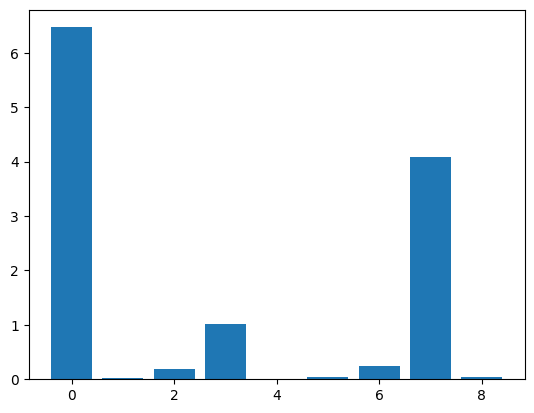

In [16]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(0,len(fs.scores_))], fs.scores_ )
pyplot.show()


In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 9)
regressor.fit(X_train,y_train)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred


In [9]:
r2_score(y_test,y_pred)

-0.04330120891947953

In [10]:
print(X_test)

     DATE_DELTA  CAUR  Average DGS       DFF  NASDAQCOM     ZHVI  \
29        882.0   5.5     1.644091  0.377667    1.42009  0.50684   
65       1977.0   4.0     2.074000  2.377667    0.26442  0.16315   
16        485.0   6.4     2.197500  0.123226    0.87205  0.52723   
10        304.0   7.1     2.325556  0.092000    6.46052  0.65561   
101      3073.0   4.2     3.143333  1.205000   -3.47270  0.29177   
2          59.0   8.0     2.723333  0.078065    1.83138  0.60021   
13        396.0   6.7     1.975263  0.110714    3.86320  0.65590   
24        730.0   5.7     2.085263  0.342903   -8.52738  0.85404   
89       2708.0   7.9     1.519091  0.078000    4.28688  2.63157   
5         151.0   7.6     2.598571  0.095667    4.77259  0.13118   
19        577.0   6.0     2.167143  0.138065   -2.91546  0.29712   
85       2588.0   8.6     1.257895  0.075714    4.17695  1.15288   
99       3012.0   4.6     2.747500  0.330000   -1.68168  1.87749   
53       1612.0   4.2     2.912381  1.819667    

<h2>Plot results</h2>

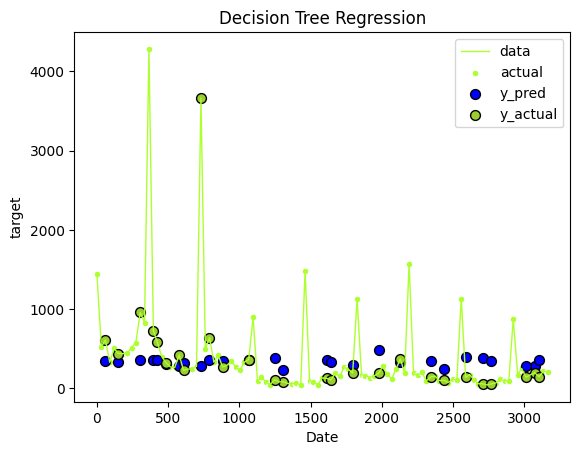

In [11]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure()
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
plt.scatter(X_test['DATE_DELTA'], y_pred,s=50, edgecolor="black", c="blue", label="y_pred")
plt.scatter(X_test['DATE_DELTA'], y_test, s=50, edgecolor="black", c="yellowgreen", label="y_actual")

plt.xlabel("Date")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()